<a href="https://colab.research.google.com/github/ahnnoah/study/blob/main/Colab/2022/2_%ED%8C%A8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN으로 패션아이템 구분하기
2022년 1월 6일
안노아

In [ ]:
# 1번 셀

# 패키지 수입
import matplotlib.pyplot as plt
import numpy as np
from time import time

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import np_utils

from keras.layers import Dense
from keras.layers import Flatten, Conv2D, MaxPool2D
from keras.layers import InputLayer


In [ ]:
# 2번 셀

# 하이퍼 파라미터
MY_EPOCH = 10        # 반복 학습 수
MY_BATCH = 500       # 매번 가져와서 계산하는 학습용 데이터 수


학습용 입력 데이터 모양: (60000, 28, 28)
학습용 출력 데이터 모양: (60000,)
평가용 입력 데이터 모양: (10000, 28, 28)
평가용 출력 데이터 모양: (10000,)
(28, 28)
0번 학습용 이미지 라벨: 9


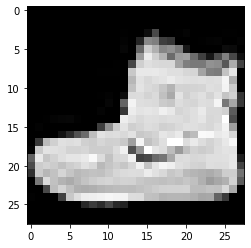

In [ ]:
# 3번 셀

# 데이터 불러 오기
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

print('학습용 입력 데이터 모양:', X_train.shape)
print('학습용 출력 데이터 모양:', Y_train.shape)
print('평가용 입력 데이터 모양:', X_test.shape)
print('평가용 출력 데이터 모양:', Y_test.shape)

# 수치 데이터는 8-bit 화소 정수 [0, 255]
#print(X_train[0])
print(X_train[0].shape)
plt.imshow(X_train[0], cmap='gray')
print('0번 학습용 이미지 라벨:', Y_train[0])


In [ ]:
# 4번 셀

# 입력 데이터 추가 처리
# 화소 데이터 [0, 1] 스케일링
X_train = X_train / 255
#print(X_train[0])
#plt.imshow(X_train[0], cmap='gray')
X_test = X_test / 255

# 이미지 채널 정보 추가
# keras convolution (합성곱) 함수가 원해서
print('전:', X_train.shape)
X_train = np.expand_dims(X_train, axis=3)
print('후:', X_train.shape)
X_test = np.expand_dims(X_test, axis=3)
print('후:', X_test.shape)


전: (60000, 28, 28)
후: (60000, 28, 28, 1)
후: (10000, 28, 28, 1)


In [ ]:
# 5번 셀

# 출력 데이터 (= 라벨) 추가 처리
print('전:', Y_train[0])
Y_train = np_utils.to_categorical(Y_train, 10)
print('후:', Y_train[0])
Y_test = np_utils.to_categorical(Y_test, 10)


전: 9
후: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# 6번 셀

# 최종 데이터 모양 확인
print('학습용 입력 데이터 모양:', X_train.shape)
print('학습용 출력 데이터 모양:', Y_train.shape)
print('평가용 입력 데이터 모양:', X_test.shape)
print('평가용 출력 데이터 모양:', Y_test.shape)


학습용 입력 데이터 모양: (60000, 28, 28, 1)
학습용 출력 데이터 모양: (60000, 10)
평가용 입력 데이터 모양: (10000, 28, 28, 1)
평가용 출력 데이터 모양: (10000, 10)


In [ ]:
# 7번 셀

# 인공 신경망 구현: CNN
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))

# 첫번째 합성곱 블럭 추가
model.add(Conv2D(filters=32,
                 kernel_size=2,
                 padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=2))

# 두번째 합성곱 블럭 추가
model.add(Conv2D(filters=64,
                 kernel_size=2,
                 padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=2))

# 화소를 뉴런으로 전환
model.add(Flatten())

# 첫번째 은닉층
model.add(Dense(units=128,
                activation='relu'))

# 출력층
model.add(Dense(units=10,
                activation='softmax'))

# CNN 요약
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
# 8번 셀

# CNN 학습
# 1. 학습 환경 설정
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

# 2. 반복 학습 진행
print('학습 시작')
begin = time()

model.fit(X_train,
          Y_train,
          epochs=MY_EPOCH,
          batch_size=MY_BATCH,
          verbose=1)

end = time()
print('총 학습 시간:', end-begin)


학습 시작
Epoch 1/10
120/120 [==============================] - 3s 9ms/step - loss: 0.6806 - acc: 0.7711
Epoch 2/10
120/120 [==============================] - 1s 8ms/step - loss: 0.3945 - acc: 0.8603
Epoch 3/10
120/120 [==============================] - 1s 8ms/step - loss: 0.3430 - acc: 0.8784
Epoch 4/10
120/120 [==============================] - 1s 8ms/step - loss: 0.3101 - acc: 0.8905
Epoch 5/10
120/120 [==============================] - 1s 8ms/step - loss: 0.2907 - acc: 0.8972
Epoch 6/10
120/120 [==============================] - 1s 8ms/step - loss: 0.2752 - acc: 0.9015
Epoch 7/10
120/120 [==============================] - 1s 8ms/step - loss: 0.2613 - acc: 0.9064
Epoch 8/10
120/120 [==============================] - 1s 8ms/step - loss: 0.2491 - acc: 0.9115
Epoch 9/10
120/120 [==============================] - 1s 8ms/step - loss: 0.2413 - acc: 0.9123
Epoch 10/10
120/120 [==============================] - 1s 8ms/step - loss: 0.2281 - acc: 0.9181
총 학습 시간: 21.15742826461792


In [ ]:
# 9번 셀

# CNN 평가
score = model.evaluate(X_test,
                       Y_test)

print('최종 정확도:', score[1])


313/313 [==============================] - 1s 3ms/step - loss: 0.2688 - acc: 0.9031
최종 정확도: 0.9031000137329102


(28, 28, 1)
(28, 28)
라벨: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
CNN 예측: 9


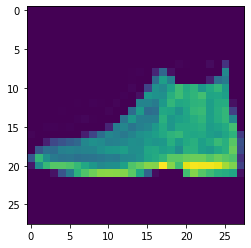

In [ ]:
# 10번 셀

# 샘플 결과 출력
print(X_test[0].shape)

# imshow 함수는 채널 정보를 제거해야 함
# (28, 28, 1) -> (28, 28)
#img = np.squeeze(X_test[0])
img = X_test[0].squeeze()
print(img.shape)
plt.imshow(img)
print('라벨:', Y_test[0])

# CNN 예측
pred = model.predict(X_test)
print('CNN 예측:', np.argmax(pred[0]))

